# 图像数据处理

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Color模块和exposure模块

## 基本操作

(300, 451, 3)


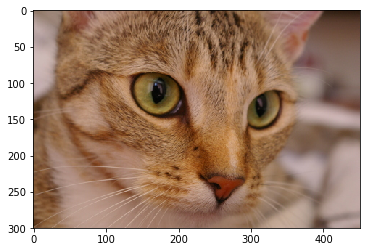

In [2]:
from skimage import data

color_image = data.chelsea()

print(color_image.shape)
plt.imshow(color_image)

### 分割和索引

(300, 451)


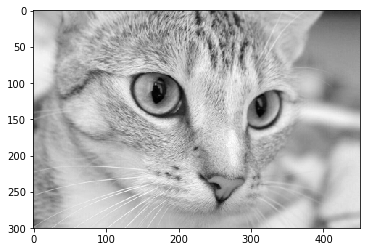

In [5]:
red_channel = color_image[:, :, 0]  # 红色通道
plt.imshow(red_channel, cmap='gray')
print(red_channel.shape)

### RGB -> Gray

(300, 451)


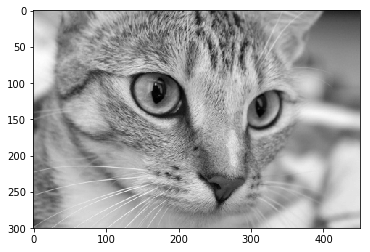

In [7]:
import skimage

gray_img = skimage.color.rgb2gray(color_image)
plt.imshow(gray_img, cmap='gray')
print(gray_img.shape)

## 颜色直方图

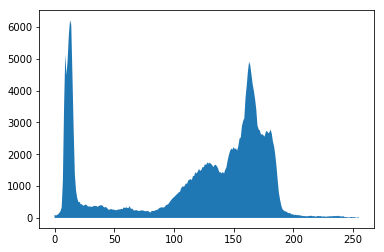

In [22]:
from skimage import data
from skimage import exposure

# 灰度图颜色直方图
image = data.camera()
#print(image.shape)

hist, bin_centers = exposure.histogram(image)
fig, ax = plt.subplots(ncols=1)
ax.fill_between(bin_centers, hist)

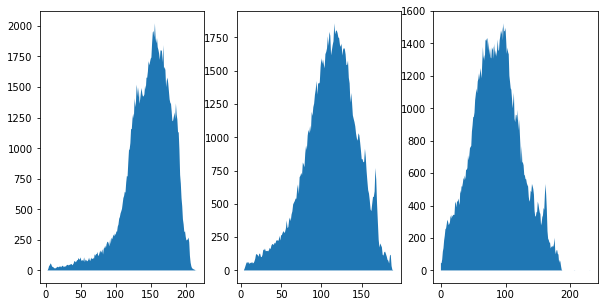

In [20]:
# 彩色图像直方图
cat = data.chelsea()

# R通道
hist_r, bin_centers_r = exposure.histogram(cat[:,:,0])
# G通道
hist_g, bin_centers_g = exposure.histogram(cat[:,:,1])
# B通道
hist_b, bin_centers_b = exposure.histogram(cat[:,:,2])

fig, (ax_r, ax_g, ax_b) = plt.subplots(ncols=3, figsize=(10, 5))
#ax = plt.gca()
ax_r.fill_between(bin_centers_r, hist_r)
ax_g.fill_between(bin_centers_g, hist_g)
ax_b.fill_between(bin_centers_b, hist_b)

## 对比度

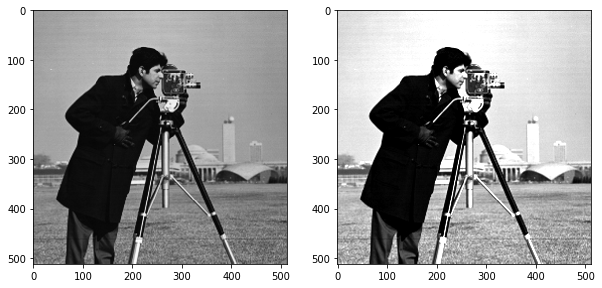

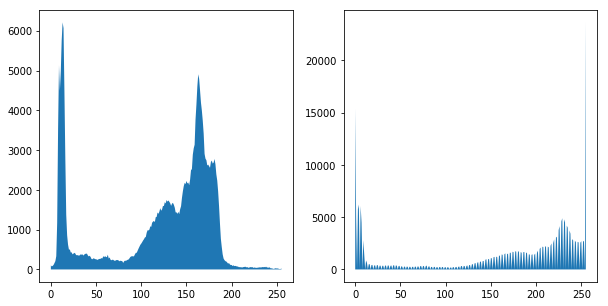

In [28]:
# 原图像
image = data.camera()
hist, bin_centers = exposure.histogram(image)

# 改变对比度
# image中小于10的像素值设为0，大于180的像素值设为255
high_contrast = exposure.rescale_intensity(image, in_range=(10, 180))
hist2, bin_centers2 = exposure.histogram(high_contrast)

# 图像对比 
fig, (ax_1, ax_2) = plt.subplots(ncols=2, figsize=(10, 5))
ax_1.imshow(image, cmap='gray')
ax_2.imshow(high_contrast, cmap='gray')

fig, (ax_hist1, ax_hist2) = plt.subplots(ncols=2, figsize=(10, 5))
ax_hist1.fill_between(bin_centers, hist)
ax_hist2.fill_between(bin_centers2, hist2)

## 直方图均衡化

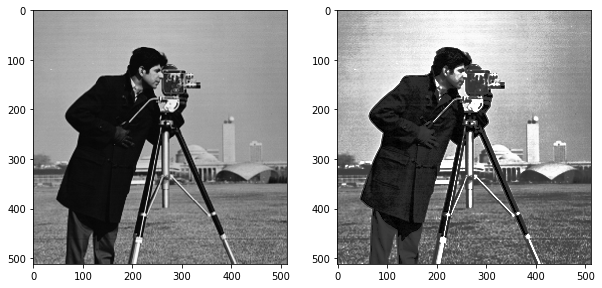

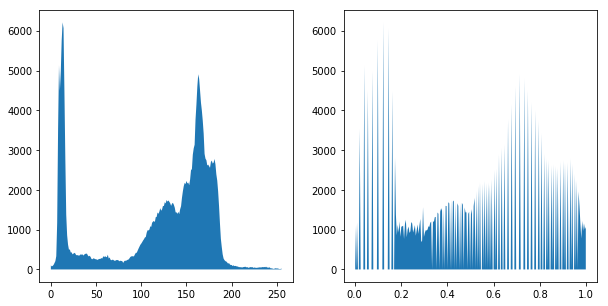

In [31]:
# 直方图均衡化
equalized = exposure.equalize_hist(image)
hist3, bin_centers3 = exposure.histogram(equalized)

# 图像对比 
fig, (ax_1, ax_2) = plt.subplots(ncols=2, figsize=(10, 5))
ax_1.imshow(image, cmap='gray')
ax_2.imshow(equalized, cmap='gray')

fig, (ax_hist1, ax_hist2) = plt.subplots(ncols=2, figsize=(10, 5))
ax_hist1.fill_between(bin_centers, hist)
ax_hist2.fill_between(bin_centers3, hist3)

## 图像滤波

### 中值滤波

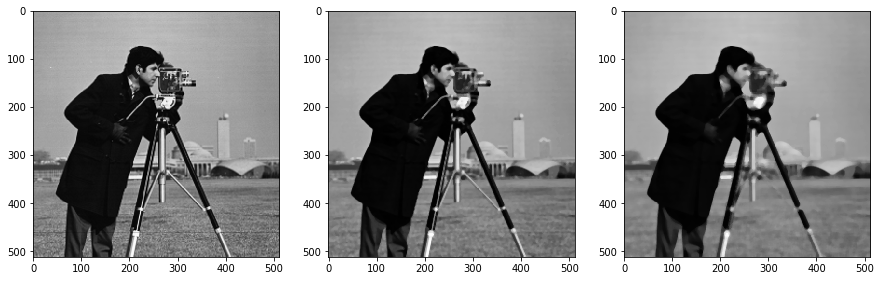

In [44]:
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import median

img = data.camera()
med1 = median(img, disk(3)) # 3x3中值滤波
med2 = median(img, disk(5)) # 5x5中值滤波

# 图像对比 
fig, (ax_1, ax_2, ax_3) = plt.subplots(ncols=3, figsize=(15, 10))
ax_1.imshow(img, cmap='gray')
ax_2.imshow(med1, cmap='gray')
ax_3.imshow(med2, cmap='gray')

### 高斯滤波

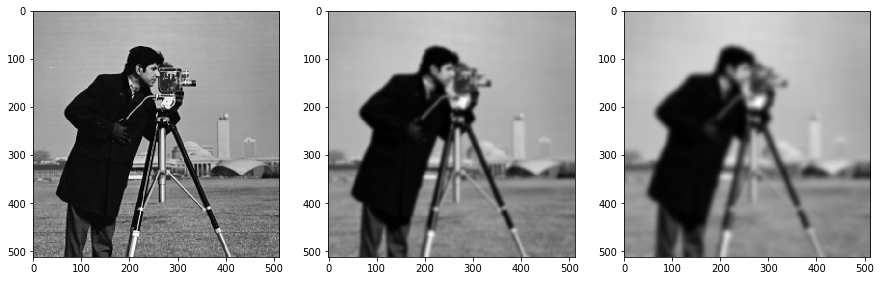

In [46]:
from skimage import data
from skimage.morphology import disk
from skimage.filters import gaussian

img = data.camera()
gas1 = gaussian(img, sigma=3) # sigma=3
gas2 = gaussian(img, sigma=5) # sigma=5

# 图像对比 
fig, (ax_1, ax_2, ax_3) = plt.subplots(ncols=3, figsize=(15, 10))
ax_1.imshow(img, cmap='gray')
ax_2.imshow(gas1, cmap='gray')
ax_3.imshow(gas2, cmap='gray')